# Practical Data Science - Assignment 2

## Statlog (Heart) Analysis

 Data collected from UCI Machine Learning Library

### Attribute Information:

1. age       
2. sex (1 = male; 0 = female)      
3. chest pain type  (4 values) 
   Value 1: typical angina
   Value 2: atypical angina
   Value 3: non-anginal pain 
   Value 4: asymptomatic 
4. resting blood pressure  
5. serum cholestoral in mg/dl      
6. fasting blood sugar > 120 mg/dl (1 = true; 0 = false)      
7. resting electrocardiographic results  (values 0,1,2)
   Value 0: normal
   Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
   Value 2: showing probable or definite left ventricular hypertrophy 
8. maximum heart rate achieved  
9. exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest   
11. the slope of the peak exercise ST segment  
   Value 1: upsloping 
   Value 2: flat 
   Value 3: downsloping 
12. number of major vessels (0-3) colored by flourosopy        
13.  thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

### Attributes types

Real: 1,4,5,8,10,12 Ordered:11, Binary: 2,6,9 Nominal:7,3,13

## Variable to be predicted

Absence (1) or presence (2) of heart disease

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
column_names = ['age','sex','cp_type','resting_bp','serum_cholestoral',
                'fasting_bs','resting_ec','maximum_heart_rate',
                'angina','oldpeak','slope','major_vessels','thal','heart_disease']

heart = pd.read_csv('heart.dat', delimiter=' ', header=None, names=column_names, index_col=False)

In [3]:
heart.head()

,age,sex,cp_type,resting_bp,serum_cholestoral,fasting_bs,resting_ec,maximum_heart_rate,angina,oldpeak,slope,major_vessels,thal,heart_disease
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


In [4]:

heart.dtypes

age                   float64
sex                   float64
cp_type               float64
resting_bp            float64
serum_cholestoral     float64
fasting_bs            float64
resting_ec            float64
maximum_heart_rate    float64
angina                float64
oldpeak               float64
slope                 float64
major_vessels         float64
thal                  float64
heart_disease           int64
dtype: object

In [5]:
#checking the NaN values in the data set
heart.isnull().any()

age                   False
sex                   False
cp_type               False
resting_bp            False
serum_cholestoral     False
fasting_bs            False
resting_ec            False
maximum_heart_rate    False
angina                False
oldpeak               False
slope                 False
major_vessels         False
thal                  False
heart_disease         False
dtype: bool

## TASK-2 Data Exploration

### 1.Age

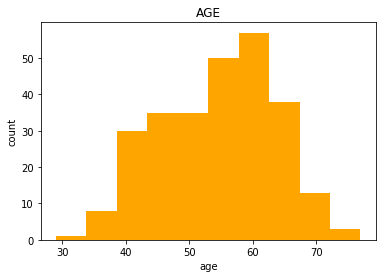

In [6]:

heart['age'].plot(kind='hist',bins=10,color='orange')

plt.title( 'AGE')
plt.xlabel('age')
plt.ylabel('count')
plt.show()

### 2.Sex

In [7]:
heart.sex.unique()

array([1., 0.])

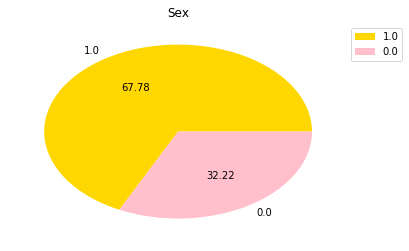

In [8]:
heart['sex'].value_counts().plot(kind='pie',autopct='%.2f',colors=['gold','pink']) 
plt.legend(bbox_to_anchor=(1.0,1.0))

plt.title('Sex')
plt.xlabel('')
plt.ylabel('')

plt.show()

### 3.Chest Pain Type

In [9]:
heart.cp_type.unique()

array([4., 3., 2., 1.])

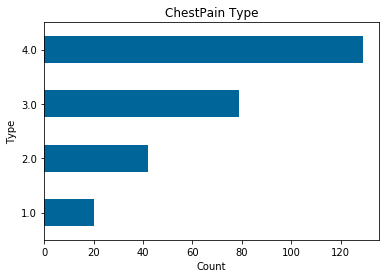

In [10]:
pd.value_counts(heart['cp_type'].values, sort=True, ascending=True).plot(kind='barh', color='#006699')
plt.title('ChestPain Type')
plt.xlabel('Count')
plt.ylabel('Type')
plt.show()

### 4.Resting Blood Pressure

In [11]:
heart.resting_bp.unique()

array([130., 115., 124., 128., 120., 110., 140., 150., 135., 142., 134.,
       112., 132., 138., 160., 170., 144., 122., 152., 101., 126., 118.,
       136., 105., 174., 145., 108., 156., 106., 104.,  94., 146., 148.,
       178., 125., 100., 165., 180., 158., 200., 117., 192., 123., 129.,
       102., 155., 172.])

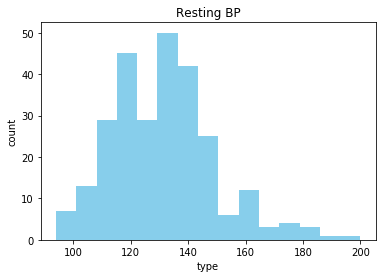

In [12]:
heart['resting_bp'].plot(kind='hist',bins=15,color='skyblue')

plt.title( 'Resting BP')
plt.xlabel('type')
plt.ylabel('count')
plt.show()

### 5.Serum Cholestoral 

In [13]:
heart.serum_cholestoral.unique()

array([322., 564., 261., 263., 269., 177., 256., 239., 293., 407., 234.,
       226., 235., 303., 149., 311., 203., 211., 199., 229., 245., 204.,
       288., 275., 243., 295., 230., 265., 228., 215., 326., 200., 207.,
       273., 180., 222., 223., 209., 233., 197., 218., 246., 225., 315.,
       205., 417., 195., 198., 166., 178., 249., 281., 126., 305., 240.,
       276., 319., 242., 260., 354., 309., 208., 236., 270., 214., 201.,
       244., 306., 221., 330., 266., 206., 212., 302., 313., 141., 237.,
       289., 254., 274., 258., 160., 327., 304., 271., 283., 188., 286.,
       360., 267., 196., 232., 277., 210., 213., 282., 167., 224., 268.,
       250., 219., 217., 308., 193., 231., 262., 259., 325., 299., 182.,
       294., 298., 409., 172., 184., 394., 174., 255., 248., 300., 318.,
       216., 252., 227., 220., 168., 183., 341., 186., 307., 164., 257.,
       321., 264., 253., 185., 290., 175., 353., 335., 247., 340., 284.,
       192.])

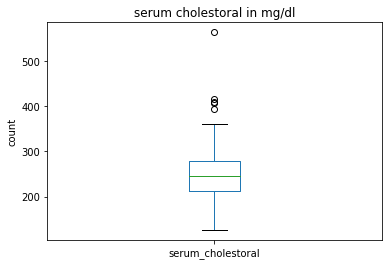

In [14]:
heart['serum_cholestoral'].plot(kind='box')
plt.title( ' serum cholestoral in mg/dl ')
plt.ylabel('count')
plt.show()

### 6.Fasting Blood Sugar

In [15]:
heart.fasting_bs.unique()

array([0., 1.])

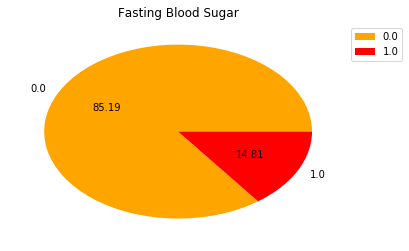

In [16]:
heart['fasting_bs'].value_counts().plot(kind='pie',autopct='%.2f',colors=['orange','red'])  
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.title('Fasting Blood Sugar')
plt.xlabel('')
plt.ylabel('')

plt.show()

### 7.Resting Electrocardiographic Results

In [17]:
heart.resting_ec.unique()

array([2., 0., 1.])

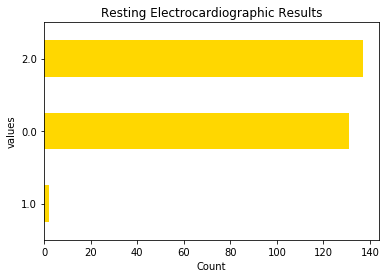

In [18]:
pd.value_counts(heart['resting_ec'].values, sort=True, ascending=True).plot(kind='barh', color='gold')
plt.title('Resting Electrocardiographic Results')
plt.xlabel('Count')
plt.ylabel('values')
plt.show()

### 8.Maximum Heart-Rate Achieved

In [19]:
heart.maximum_heart_rate.unique()

array([109., 160., 141., 105., 121., 140., 142., 170., 154., 161., 111.,
       180., 145., 159., 125., 120., 155., 144., 178., 129., 181., 143.,
       139., 152., 157., 165., 130., 150., 138., 126., 186., 163., 179.,
       156., 134., 177., 114., 184., 175., 168.,  96., 103., 173., 169.,
       171., 112., 149., 116., 147., 148., 128., 164., 108., 118., 151.,
       133., 162.,  71., 124., 166., 117., 153.,  88.,  99., 158., 132.,
       172., 192., 182., 195.,  95., 167., 122., 174., 131., 146., 115.,
       106., 194., 187., 202., 127.,  97., 136., 190., 185., 113., 188.,
       123., 137.])

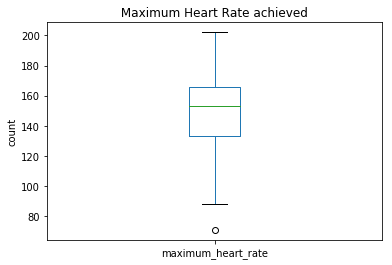

In [20]:
heart['maximum_heart_rate'].plot(kind='box')
plt.title( ' Maximum Heart Rate achieved ')
plt.ylabel('count')
plt.show()

### 9.Exercise Induced Angina

In [21]:
heart.angina.unique()

array([0., 1.])

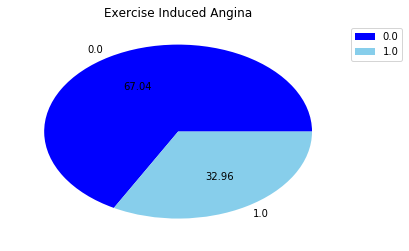

In [22]:
heart['angina'].value_counts().plot(kind='pie',autopct='%.2f',colors=['blue','skyblue'])  
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.title('Exercise Induced Angina')
plt.xlabel('')
plt.ylabel('')

plt.show()

### 10.Oldpeak

In [23]:
heart.oldpeak.unique()

array([2.4, 1.6, 0.3, 0.2, 0.4, 0.6, 1.2, 4. , 0.5, 0. , 2.6, 1.8, 3.1,
       1.4, 0.1, 2.5, 2.3, 3.4, 0.9, 1.9, 2.2, 0.8, 1. , 3.6, 1.1, 3. ,
       2. , 1.5, 4.2, 3.2, 0.7, 5.6, 3.8, 2.1, 2.9, 2.8, 3.5, 6.2, 1.3])

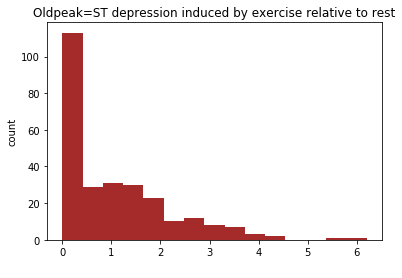

In [24]:
heart['oldpeak'].plot(kind='hist',bins=15,color='brown')

plt.title( 'Oldpeak=ST depression induced by exercise relative to rest')
plt.xlabel(' ')
plt.ylabel('count')
plt.show()

### 11. Slope of the peak exercise ST segment

In [25]:
heart.slope.unique()

array([2., 1., 3.])

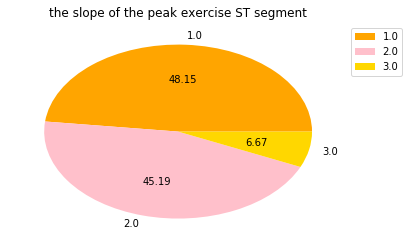

In [26]:
heart['slope'].value_counts().plot(kind='pie',autopct='%.2f',colors=['orange','pink','gold']) 
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.title('the slope of the peak exercise ST segment')
plt.xlabel('')
plt.ylabel('')

plt.show()

### 12. No.of Major vessels (0-3) colored by flourosopy

In [27]:
heart.major_vessels.unique()

array([3., 0., 1., 2.])

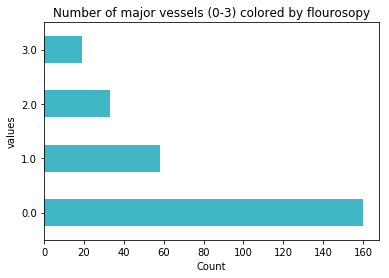

In [28]:
pd.value_counts(heart['major_vessels'].values, sort=True, ascending=False).plot(kind='barh', color='#41b6c4')
plt.title('Number of major vessels (0-3) colored by flourosopy')
plt.xlabel('Count')
plt.ylabel('values')
plt.show()

### 13.Thal

In [29]:
heart.thal.unique()

array([3., 7., 6.])

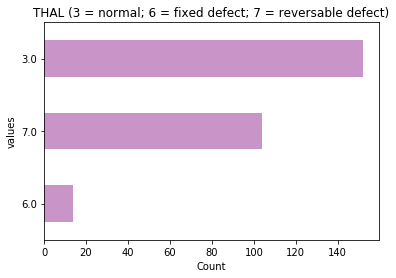

In [30]:
pd.value_counts(heart['thal'].values, sort=True, ascending=True).plot(kind='barh', color='#c994c7')
plt.title('THAL (3 = normal; 6 = fixed defect; 7 = reversable defect)')
plt.xlabel('Count')
plt.ylabel('values')
plt.show()

### Heart Disease

In [31]:
heart.heart_disease.unique()

array([2, 1])

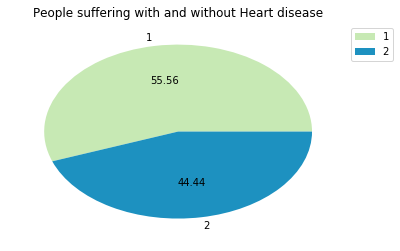

In [32]:
heart['heart_disease'].value_counts().plot(kind='pie',autopct='%.2f',colors=['#c7e9b4','#1d91c0']) 
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.title('People suffering with and without Heart disease')
plt.xlabel('')
plt.ylabel('')

plt.show()

## COMPARISION

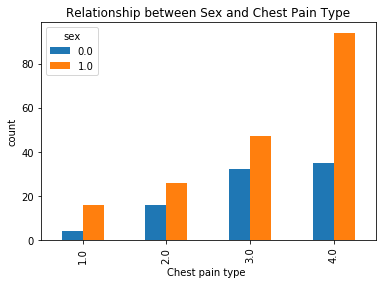

In [33]:
pd.crosstab(index=heart["cp_type"], columns=heart['sex']).plot(kind='bar')
plt.title(f'Relationship between Sex and Chest Pain Type')
plt.xlabel('Chest pain type ')
plt.ylabel('count')
plt.show()

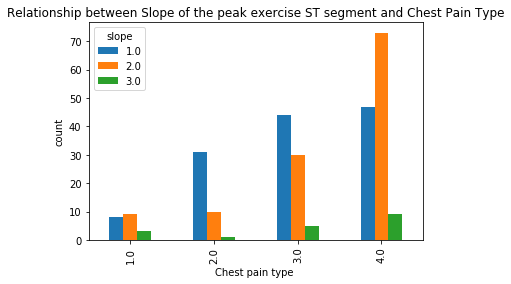

In [34]:
pd.crosstab(index=heart["cp_type"], columns=heart['slope']).plot(kind='bar')
plt.title(f'Relationship between Slope of the peak exercise ST segment and Chest Pain Type')
plt.xlabel('Chest pain type ')
plt.ylabel('count')
plt.show()

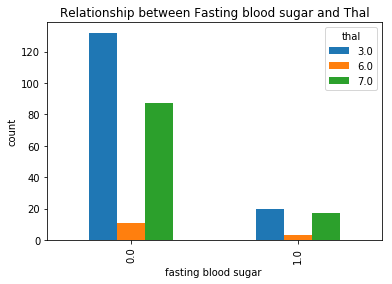

In [35]:
pd.crosstab(index=heart["fasting_bs"], columns=heart['thal']).plot(kind='bar')
plt.title(f'Relationship between Fasting blood sugar and Thal')
plt.xlabel('fasting blood sugar ')
plt.ylabel('count')
plt.show()

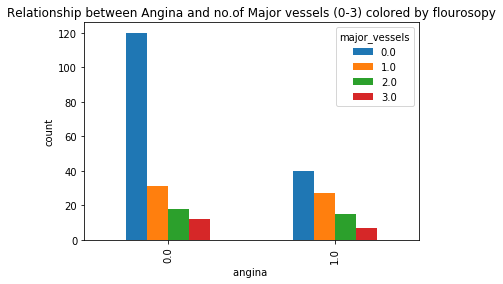

In [36]:
pd.crosstab(index=heart["angina"], columns=heart['major_vessels']).plot(kind='bar')
plt.title(f'Relationship between Angina and no.of Major vessels (0-3) colored by flourosopy')
plt.xlabel('angina ')
plt.ylabel('count')
plt.show()

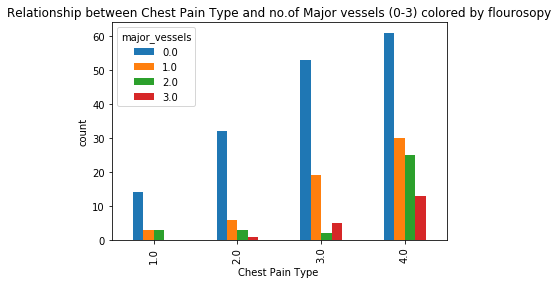

In [37]:
pd.crosstab(index=heart["cp_type"], columns=heart['major_vessels']).plot(kind='bar')
plt.title(f'Relationship between Chest Pain Type and no.of Major vessels (0-3) colored by flourosopy')
plt.xlabel('Chest Pain Type ')
plt.ylabel('count')
plt.show()

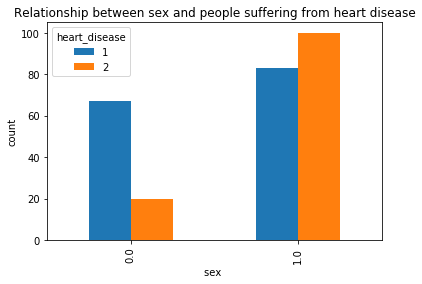

In [38]:
pd.crosstab(index=heart["sex"], columns=heart['heart_disease']).plot(kind='bar')
plt.title(f'Relationship between sex and people suffering from heart disease')
plt.xlabel('sex ')
plt.ylabel('count')
plt.show()

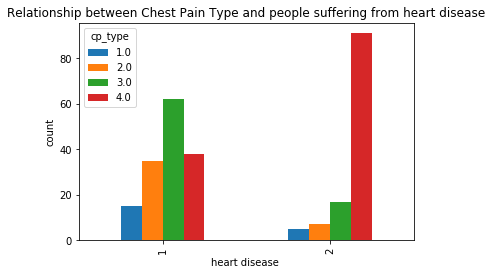

In [39]:
pd.crosstab(index=heart["heart_disease"], columns=heart['cp_type']).plot(kind='bar')
plt.title(f'Relationship between Chest Pain Type and people suffering from heart disease')
plt.xlabel('heart disease ')
plt.ylabel('count')
plt.show()

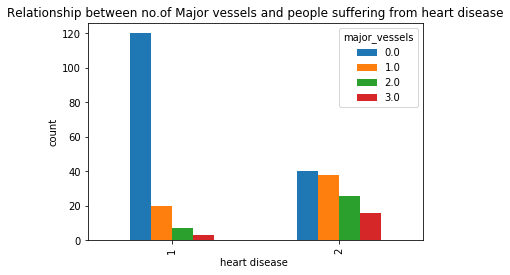

In [40]:
pd.crosstab(index=heart["heart_disease"], columns=heart['major_vessels']).plot(kind='bar')
plt.title(f'Relationship between no.of Major vessels and people suffering from heart disease')
plt.xlabel('heart disease ')
plt.ylabel('count')
plt.show()

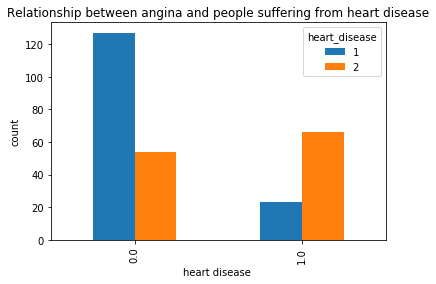

In [41]:
pd.crosstab(index=heart["angina"], columns=heart['heart_disease']).plot(kind='bar')
plt.title(f'Relationship between angina and people suffering from heart disease')
plt.xlabel('heart disease ')
plt.ylabel('count')
plt.show()

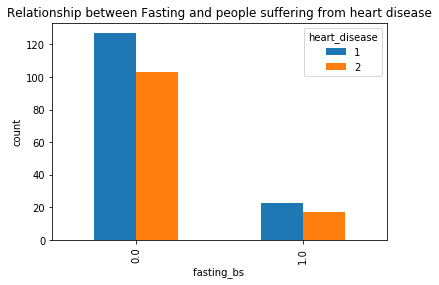

In [42]:
pd.crosstab(index=heart["fasting_bs"], columns=heart['heart_disease']).plot(kind='bar')
plt.title(f'Relationship between Fasting and people suffering from heart disease')
plt.xlabel('fasting_bs ')
plt.ylabel('count')
plt.show()

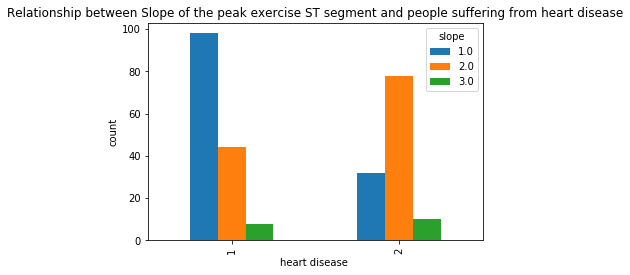

In [43]:
pd.crosstab(index=heart["heart_disease"], columns=heart['slope']).plot(kind='bar')
plt.title(f'Relationship between Slope of the peak exercise ST segment and people suffering from heart disease')
plt.xlabel('heart disease ')
plt.ylabel('count')
plt.show()

## CLASSIFICATION

In [44]:
heart.head()

,age,sex,cp_type,resting_bp,serum_cholestoral,fasting_bs,resting_ec,maximum_heart_rate,angina,oldpeak,slope,major_vessels,thal,heart_disease
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


In [45]:
heart.heart_disease

0      2
1      1
2      2
3      1
4      1
5      1
6      2
7      2
8      2
9      2
10     1
11     1
12     1
13     2
14     1
15     1
16     2
17     2
18     1
19     1
20     2
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     2
29     1
      ..
240    2
241    1
242    1
243    2
244    1
245    2
246    2
247    1
248    2
249    2
250    2
251    1
252    2
253    1
254    1
255    1
256    1
257    2
258    2
259    1
260    1
261    2
262    2
263    1
264    2
265    1
266    1
267    1
268    1
269    2
Name: heart_disease, Length: 270, dtype: int64

In [46]:
heart.heart_disease.shape

(270,)

In [47]:
from sklearn import preprocessing

In [48]:
le = preprocessing.LabelEncoder()

In [49]:
analysis=heart['heart_disease']

In [50]:
analysis

0      2
1      1
2      2
3      1
4      1
5      1
6      2
7      2
8      2
9      2
10     1
11     1
12     1
13     2
14     1
15     1
16     2
17     2
18     1
19     1
20     2
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     2
29     1
      ..
240    2
241    1
242    1
243    2
244    1
245    2
246    2
247    1
248    2
249    2
250    2
251    1
252    2
253    1
254    1
255    1
256    1
257    2
258    2
259    1
260    1
261    2
262    2
263    1
264    2
265    1
266    1
267    1
268    1
269    2
Name: heart_disease, Length: 270, dtype: int64

In [51]:
analysis.value_counts()

1    150
2    120
Name: heart_disease, dtype: int64

In [52]:
y=analysis

In [53]:
y

0      2
1      1
2      2
3      1
4      1
5      1
6      2
7      2
8      2
9      2
10     1
11     1
12     1
13     2
14     1
15     1
16     2
17     2
18     1
19     1
20     2
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     2
29     1
      ..
240    2
241    1
242    1
243    2
244    1
245    2
246    2
247    1
248    2
249    2
250    2
251    1
252    2
253    1
254    1
255    1
256    1
257    2
258    2
259    1
260    1
261    2
262    2
263    1
264    2
265    1
266    1
267    1
268    1
269    2
Name: heart_disease, Length: 270, dtype: int64

In [54]:
del heart['heart_disease']

In [55]:
heart.head()

,age,sex,cp_type,resting_bp,serum_cholestoral,fasting_bs,resting_ec,maximum_heart_rate,angina,oldpeak,slope,major_vessels,thal
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0


In [56]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test =train_test_split(heart,y,test_size=0.4,random_state=0)

In [57]:
X_train

,age,sex,cp_type,resting_bp,serum_cholestoral,fasting_bs,resting_ec,maximum_heart_rate,angina,oldpeak,slope,major_vessels,thal
107,60.0,0.0,4.0,150.0,258.0,0.0,2.0,157.0,0.0,2.6,2.0,2.0,7.0
239,52.0,1.0,2.0,120.0,325.0,0.0,0.0,172.0,0.0,0.2,1.0,0.0,3.0
265,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0
129,60.0,1.0,4.0,117.0,230.0,1.0,0.0,160.0,1.0,1.4,1.0,2.0,7.0
24,54.0,0.0,2.0,132.0,288.0,1.0,2.0,159.0,1.0,0.0,1.0,1.0,3.0
30,57.0,1.0,3.0,128.0,229.0,0.0,2.0,150.0,0.0,0.4,2.0,1.0,7.0
249,60.0,1.0,4.0,145.0,282.0,0.0,2.0,142.0,1.0,2.8,2.0,2.0,7.0
157,45.0,1.0,2.0,128.0,308.0,0.0,2.0,170.0,0.0,0.0,1.0,0.0,3.0
60,57.0,1.0,3.0,150.0,126.0,1.0,0.0,173.0,0.0,0.2,1.0,1.0,7.0


In [58]:
X_train.shape

(162, 13)

In [59]:
y_train

107    2
239    1
265    1
3      1
129    2
24     1
30     2
249    2
157    1
60     1
56     2
245    2
155    1
46     2
19     1
209    1
221    2
54     1
224    1
80     2
51     1
2      2
228    1
104    2
173    1
86     1
10     1
160    2
58     2
41     1
      ..
175    2
79     1
197    1
243    2
208    2
115    1
148    2
263    1
72     1
77     1
25     1
165    1
81     2
258    2
174    1
260    1
39     1
193    2
88     1
70     2
87     1
242    1
211    1
9      2
195    1
251    1
192    1
117    2
47     2
172    2
Name: heart_disease, Length: 162, dtype: int64

In [60]:
X_test

,age,sex,cp_type,resting_bp,serum_cholestoral,fasting_bs,resting_ec,maximum_heart_rate,angina,oldpeak,slope,major_vessels,thal
64,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
135,46.0,0.0,3.0,142.0,177.0,0.0,2.0,160.0,1.0,1.4,3.0,0.0,3.0
153,64.0,0.0,4.0,130.0,303.0,0.0,0.0,122.0,0.0,2.0,2.0,2.0,3.0
189,70.0,1.0,3.0,160.0,269.0,0.0,0.0,112.0,1.0,2.9,2.0,1.0,7.0
253,51.0,1.0,3.0,110.0,175.0,0.0,0.0,123.0,0.0,0.6,1.0,0.0,3.0
198,69.0,0.0,1.0,140.0,239.0,0.0,0.0,151.0,0.0,1.8,1.0,2.0,3.0
144,54.0,1.0,2.0,192.0,283.0,0.0,2.0,195.0,0.0,0.0,1.0,1.0,7.0
180,42.0,1.0,3.0,120.0,240.0,1.0,0.0,194.0,0.0,0.8,3.0,0.0,7.0
256,61.0,1.0,3.0,150.0,243.0,1.0,0.0,137.0,1.0,1.0,2.0,0.0,3.0
15,71.0,0.0,4.0,112.0,149.0,0.0,0.0,125.0,0.0,1.6,2.0,0.0,3.0


In [61]:
y_test

64     1
135    1
153    1
189    2
253    1
198    1
144    2
180    1
256    1
15     1
244    1
139    1
124    1
103    2
8      2
166    1
45     1
199    2
59     2
264    2
176    2
55     1
7      2
76     1
252    2
83     1
190    1
136    1
188    1
101    2
      ..
259    1
126    2
33     2
97     2
217    1
232    1
250    2
21     1
234    1
161    2
16     2
118    1
75     2
194    1
210    2
145    2
109    1
4      1
150    1
61     2
67     2
52     1
66     1
26     1
205    1
212    1
122    2
248    2
40     2
13     2
Name: heart_disease, Length: 108, dtype: int64

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
 clf = DecisionTreeClassifier()

In [64]:
fit = clf.fit(X_train,y_train)

In [65]:
y_pre = fit.predict(X_test)  

In [66]:
y_pre

array([2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1,
       2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1,
       2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2])

In [67]:
y_pre.shape

(108,)

In [68]:
from sklearn.metrics import confusion_matrix



In [69]:
cm = confusion_matrix(y_test, y_pre)

In [70]:
print(cm)

[[44 18]
 [12 34]]


In [71]:
from sklearn.metrics import classification_report

In [72]:
 print( classification_report(y_test,y_pre))

             precision    recall  f1-score   support

          1       0.79      0.71      0.75        62
          2       0.65      0.74      0.69        46

avg / total       0.73      0.72      0.72       108



In [73]:
from sklearn import tree

In [74]:
from sklearn.neighbors import KNeighborsClassifier


In [75]:
clf2 = KNeighborsClassifier(5)

In [76]:
fit=clf2.fit(X_train, y_train)

In [77]:
y_pre2=fit.predict(X_test)

In [78]:
y_pre2

array([2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2,
       2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1,
       2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2])

In [79]:
cm2 = confusion_matrix(y_test, y_pre2)

In [80]:
print (cm2)

[[40 22]
 [19 27]]


In [81]:
print (classification_report(y_test,y_pre3))

NameError: name 'y_pre3' is not defined

In [82]:
print ("[Train/test split] score: {:.5f}".format(clf2.score(X_test, y_test)))

[Train/test split] score: 0.62037


In [83]:
from sklearn.model_selection import KFold

In [84]:
kf = KFold(n_splits=5,random_state=4)

In [85]:
for train_index, test_index in enumerate(kf.split(cars_encoded)):
    X_train, X_test = cars_encoded[train_index, cars_encoded[test_index]
    y_train, y_test = y[train_index],y[test_index]
    clf2.fit(X_train, y_train)
    print ("[fold {0}] score: {1:.5f}".format(k, clf2.score(X_test, y_test)))

SyntaxError: invalid syntax (<ipython-input-85-2f45d015dd6c>, line 3)

In [86]:
loo = LeaveOneOut()
loo.get_n_splits(5)

NameError: name 'LeaveOneOut' is not defined

In [87]:
from sklearn.model_selection import KFold 

In [88]:
kf = KFold(n_splits=5, random_state=None) 

In [89]:
for train_index, test_index in kf.split(cars_encoded):
    print("Train:",train_index,"Validation:",val_index)
      X_train, X_test = X[train_index], X[val_index] 
      y_train, y_test = y[train_index], y[val_index]
    

IndentationError: unexpected indent (<ipython-input-89-6827a163b94d>, line 3)

In [90]:
kf = KFold(n_splits=5)

In [91]:
for train, test in kf.split(heart):
     print("%s %s" % (train, test))

[ 54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 4

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
clf3 = RandomForestClassifier(max_depth=2, random_state=0)

In [94]:
clf3.fit(heart,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [95]:
print(clf3.feature_importances_)

[0.033638   0.0404269  0.11565049 0.         0.01446394 0.
 0.         0.17997601 0.05521782 0.07349302 0.11574889 0.10457071
 0.26681422]


In [96]:
clf34 = RandomForestClassifier(max_depth=3, random_state=1)

In [97]:
clf34.fit(heart,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [98]:
print(clf34.feature_importances_)

[0.02352023 0.00339867 0.11345973 0.02661592 0.04652155 0.00566454
 0.00530441 0.15266768 0.07282279 0.0939831  0.04296518 0.05850131
 0.3545749 ]


In [99]:
print("heart.describe: ", heart.describe())

heart.describe:                age         sex     cp_type  resting_bp  serum_cholestoral  \
count  270.000000  270.000000  270.000000  270.000000         270.000000   
mean    54.433333    0.677778    3.174074  131.344444         249.659259   
std      9.109067    0.468195    0.950090   17.861608          51.686237   
min     29.000000    0.000000    1.000000   94.000000         126.000000   
25%     48.000000    0.000000    3.000000  120.000000         213.000000   
50%     55.000000    1.000000    3.000000  130.000000         245.000000   
75%     61.000000    1.000000    4.000000  140.000000         280.000000   
max     77.000000    1.000000    4.000000  200.000000         564.000000   

       fasting_bs  resting_ec  maximum_heart_rate      angina    oldpeak  \
count  270.000000  270.000000          270.000000  270.000000  270.00000   
mean     0.148148    1.022222          149.677778    0.329630    1.05000   
std      0.355906    0.997891           23.165717    0.470952    1.145

In [100]:
print("dataframe.describe: ", heart.describe())

dataframe.describe:                age         sex     cp_type  resting_bp  serum_cholestoral  \
count  270.000000  270.000000  270.000000  270.000000         270.000000   
mean    54.433333    0.677778    3.174074  131.344444         249.659259   
std      9.109067    0.468195    0.950090   17.861608          51.686237   
min     29.000000    0.000000    1.000000   94.000000         126.000000   
25%     48.000000    0.000000    3.000000  120.000000         213.000000   
50%     55.000000    1.000000    3.000000  130.000000         245.000000   
75%     61.000000    1.000000    4.000000  140.000000         280.000000   
max     77.000000    1.000000    4.000000  200.000000         564.000000   

       fasting_bs  resting_ec  maximum_heart_rate      angina    oldpeak  \
count  270.000000  270.000000          270.000000  270.000000  270.00000   
mean     0.148148    1.022222          149.677778    0.329630    1.05000   
std      0.355906    0.997891           23.165717    0.470952    1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a19f15cf8>,
      dtype=object)

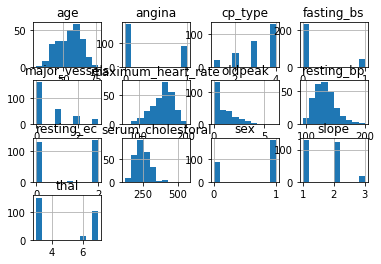

In [101]:
heart.hist()

In [104]:
dataset = heart.values

In [105]:
import numpy

In [106]:
X = dataset[:,0:6]
Y = numpy.asarray(dataset[:,6], dtype="S6")

In [107]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2)

In [108]:
clf2.fit(X_Train, Y_Train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [111]:
predictions = clf2.predict(X_Test)

In [112]:
from sklearn.metrics import accuracy_score

In [114]:
score = accuracy_score(Y_Test, predictions)

In [115]:
print(score)

0.3888888888888889


In [116]:
from sklearn.model_selection import KFold

In [117]:
kf = KFold(n_splits=10,random_state=4)

In [ ]:
/////////////////////////////////////